In [2]:
!pip install numpy pandas matplotlib scikit-learn statsmodels

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Warm-Up!

## Load the diabetes dataset

In [6]:
diabetes = datasets.load_diabetes(scaled = False)
data = pd.DataFrame(data=np.c_[diabetes['data'], diabetes['target']], columns=diabetes['feature_names'] + ['target'])

## Display the first ten rows of the dataset

In [7]:
print(data.head(10))

    age  sex   bmi     bp     s1     s2    s3    s4      s5    s6  target
0  59.0  2.0  32.1  101.0  157.0   93.2  38.0  4.00  4.8598  87.0   151.0
1  48.0  1.0  21.6   87.0  183.0  103.2  70.0  3.00  3.8918  69.0    75.0
2  72.0  2.0  30.5   93.0  156.0   93.6  41.0  4.00  4.6728  85.0   141.0
3  24.0  1.0  25.3   84.0  198.0  131.4  40.0  5.00  4.8903  89.0   206.0
4  50.0  1.0  23.0  101.0  192.0  125.4  52.0  4.00  4.2905  80.0   135.0
5  23.0  1.0  22.6   89.0  139.0   64.8  61.0  2.00  4.1897  68.0    97.0
6  36.0  2.0  22.0   90.0  160.0   99.6  50.0  3.00  3.9512  82.0   138.0
7  66.0  2.0  26.2  114.0  255.0  185.0  56.0  4.55  4.2485  92.0    63.0
8  60.0  2.0  32.1   83.0  179.0  119.4  42.0  4.00  4.4773  94.0   110.0
9  29.0  1.0  30.0   85.0  180.0   93.4  43.0  4.00  5.3845  88.0   310.0


## Print the data types of each feature to ensure they are numeric.

In [10]:
print(data.dtypes)

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


## Check for any missing values in the dataset and handle them

In [11]:
print(data.isnull().sum())

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


## Normalize the features

In [12]:
column_names = data.columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
data = pd.DataFrame(scaled_data, columns=column_names)

In [13]:
print(data.head(10))

        age       sex       bmi        bp        s1        s2        s3  \
0  0.800500  1.065488  1.297088  0.459841 -0.929746 -0.732065 -0.912451   
1 -0.039567 -0.938537 -1.082180 -0.553505 -0.177624 -0.402886  1.564414   
2  1.793307  1.065488  0.934533 -0.119214 -0.958674 -0.718897 -0.680245   
3 -1.872441 -0.938537 -0.243771 -0.770650  0.256292  0.525397 -0.757647   
4  0.113172 -0.938537 -0.764944  0.459841  0.082726  0.327890  0.171178   
5 -1.948811 -0.938537 -0.855583 -0.408741 -1.450445 -1.666931  0.867796   
6 -0.956004  1.065488 -0.991541 -0.336359 -0.842963 -0.521390  0.016374   
7  1.335088  1.065488 -0.039834  1.400804  1.905174  2.289794  0.480786   
8  0.876870  1.065488  1.297088 -0.843032 -0.293335  0.130383 -0.602843   
9 -1.490592 -0.938537  0.821235 -0.698268 -0.264408 -0.725481 -0.525441   

         s4        s5        s6    target  
0 -0.054499  0.418531 -0.370989 -0.014719  
1 -0.830301 -1.436589 -1.938479 -1.001659  
2 -0.054499  0.060156 -0.545154 -0.144580 

## Split the data into training and testing sets using a standard ratio

In [15]:
X = data.drop('target', axis=1)
y = data['target']

In [16]:


# Split the data using 95% for training and 5% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Display the number of instances in both the training and testing datasets
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 419
Testing set size: 23


# Main Task

## Part 1: Functions’ Implementation

### Mean Squared Error (MSE)

In [18]:
def mean_squared_error(y_true, y_pred):
    n = len(y_true)
    mse = sum((y_pred[i] - y_true[i])**2 for i in range(n)) / n
    return mse

### Mean Absolute Error (MAE)

In [19]:
def mean_absolute_error(y_true, y_pred):
    n = len(y_true)
    mae = sum(abs(y_pred[i] - y_true[i]) for i in range(n)) / n
    return mae

### Root Mean Squared Error (RMSE)

In [20]:
def root_mean_squared_error(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse**0.5
    return rmse


### R² Score (Coefficient of Determination)

In [29]:
def r2_score(y_true, y_pred):
    y_mean = sum(y_true) / len(y_true)
    total_variance = sum((yi - y_mean) ** 2 for yi in y_true)
    explained_variance = sum((y_true[i] - y_pred[i]) ** 2 for i in range(len(y_true)))
    r2 = 1 - (explained_variance / total_variance)
    return r2


## Part 2: Building and Training the Linear Regression Model

In [30]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Make predictions on the test data
y_pred = model.coef_ * X_test + model.intercept_
y_pred = np.sum(y_pred, axis=1)

## Part 3: Model Evaluation

Compare the predicted values with the actual progression measures using a scatter plot, where the x-axis represents the actual values, and the y-axis represents the predicted values

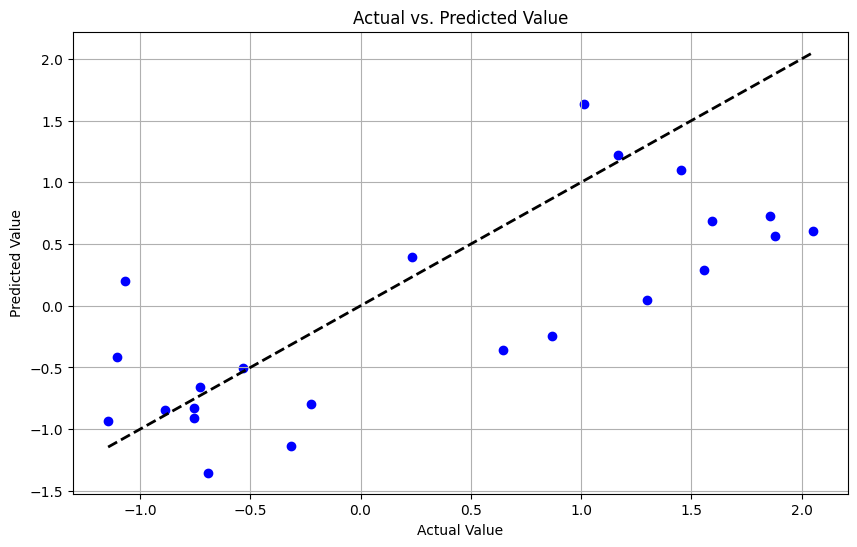

In [32]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', lw=2)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs. Predicted Value')
plt.grid()
plt.show()


Evaluate the regression model on the training and testing data using the following functions:
- MSE
- MAE
- RMSE
- R² score

In [36]:
y_train_pred = model.predict(X_train)

y_train = np.array(y_train)
y_train_pred = np.array(y_train_pred)
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Evaluate on training data
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate on testing data
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = root_mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Result of Linear Regression Model:")
print("| {:<20} | {:<6} | {:<6} | {:<6} | {:<8} |".format('Data Type/Optimizer', 'MSE', 'MAE', 'RMSE', 'R2 score'))
print("|" + "-"*60 + "|")
print("| {:<20} | {:<6.2f} | {:<6.2f} | {:<6.2f} | {:<8.2f} |".format('Train Set', mse_train, mae_train, rmse_train, r2_train))
print("| {:<20} | {:<6.2f} | {:<6.2f} | {:<6.2f} | {:<8.2f} |".format('Test Set', mse_test, mae_test, rmse_test, r2_test))

Result of Linear Regression Model:
| Data Type/Optimizer  | MSE    | MAE    | RMSE   | R2 score |
|------------------------------------------------------------|
| Train Set            | 0.48   | 0.56   | 0.69   | 0.51     |
| Test Set             | 0.67   | 0.66   | 0.82   | 0.45     |


## Part 4: Ordinary Least Squares

In [38]:
# Add a constant to the features for the intercept term
X_train_with_const = sm.add_constant(X_train)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_with_const).fit()

# Display the model summary
print(ols_model.summary())


NameError: name 'sm' is not defined

# Questions:

**1. Analyze and evaluate the values in Table (1).**  
- The model seems to perform slightly better on the training set compared to the test set for all metrics, which is common as models tend to fit more closely to the data they were trained on.
- The R² Scores are relatively low for both sets, indicating that the model does not explain much of the variance in the data. An R² Score of around 0.5 suggests that only about half of the variability in the dependent variable can be explained by the model.
- The MSE and RMSE are higher on the test set than the training set, which may indicate that the model is overfitting to the training data and generalizing less effectively to unseen data.

**2. Review the R² and Adjusted R² values obtained in part 4. Explain what these values indicate and what the implications of high or low values might be. Also, discuss the differences between these two metrics.**  


**3. Review the p-values obtained in part 4 for each column of data and explain what these values indicate. Discuss what an appropriate value for p-values is and which columns currently have suitable values.**  

**4. Assess and analyze the importance of each feature in the dataset based on the results obtained in part 4 regarding an individual's diabetic condition**  
